# Load modules and data

## Modules

In [68]:
# import usefull modules
import numpy as np # for array
import pandas as pd # for data aggration
import matplotlib.pyplot as plt # for plot
import seaborn as sns # for plot as well
###############modeling modules#########################
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.inspection import PartialDependenceDisplay
from sklearn.metrics import accuracy_score,classification_report,roc_curve,roc_auc_score,RocCurveDisplay
from sklearn.preprocessing import OrdinalEncoder
from sklearn.model_selection import RepeatedStratifiedKFold
#################geo data modules################

import geopandas as gpd
import folium

## Load data

In [3]:
stands = pd.read_csv("standsNK_BRT.csv")
# have a glance of the data first
stands.describe()

,Unnamed: 0,poly_ID,dam_year,storm,snow,altitude,fertilityc,soiltype,developmentc,mainsp,dam_G,dam_H,dam_D,dam_ratioHD,dam_age
count,321210.000000,321210.000000,321210.000000,321210.000000,321210.00000,321210.000000,321210.000000,321210.000000,321210.000000,321210.000000,321210.000000,321210.000000,321210.000000,321210.000000,321210.000000
mean,160613.090112,366583.416992,2017.222745,0.017310,0.01533,138.794611,3.192528,22.082666,7.050347,1.704816,21.260723,15.555151,18.293795,85.469273,55.310780
std,92730.278599,198966.395978,3.298688,0.130422,0.12286,40.006502,0.876955,19.460878,0.888257,1.242895,4.215813,2.806543,3.626168,4.290129,15.490390
min,1.000000,1.000000,2012.000000,0.000000,0.00000,0.000000,1.000000,10.000000,1.000000,1.000000,0.018182,0.027273,0.027273,64.131737,0.313636
25%,80307.250000,195782.750000,2014.000000,0.000000,0.00000,105.000000,3.000000,10.000000,7.000000,1.000000,18.900000,14.026990,16.285714,83.016098,44.000000
50%,160612.500000,382987.500000,2017.000000,0.000000,0.00000,133.757735,3.000000,10.000000,7.000000,1.000000,21.555556,15.700000,18.452468,84.613362,55.100000
75%,240919.750000,536264.750000,2020.000000,0.000000,0.00000,166.522135,4.000000,21.000000,8.000000,2.000000,24.123762,17.265995,20.440000,86.680335,65.972973
max,321228.000000,695774.000000,2023.000000,1.000000,1.00000,310.307767,10.000000,90.000000,11.000000,27.000000,36.000000,27.868254,34.412698,360.000000,174.000000


In [20]:
stands.head()

,Unnamed: 0,poly_ID,dam_year,storm,snow,altitude,fertilityc,soiltype,developmentc,mainsp,dam_G,dam_H,dam_D,dam_ratioHD,dam_age
0,1,1,2022,0,0,75.912500,1,10,7,3,18.176471,19.782353,20.411765,96.916427,40.705882
1,2,2,2020,0,0,81.607692,2,70,7,3,20.156250,17.093750,16.437500,103.992395,33.281250
2,3,3,2020,0,0,82.820000,2,10,7,3,20.769231,18.297436,18.871795,96.956522,37.333333
3,4,4,2018,0,0,87.025899,2,10,7,3,21.206395,19.579942,21.398256,91.502513,46.122093
4,5,5,2016,0,0,87.733846,2,10,7,3,17.401302,16.726247,17.117137,97.716386,32.498915


### aggrate the data based on different classes

In [10]:
# 1. based on developmentc
stands[['storm',"developmentc"]].groupby(["developmentc","storm"]).value_counts()

developmentc  storm
1             0            86
              1             4
2             0           528
              1            33
3             0           720
              1             4
4             0          1928
              1            13
5             0          5443
              1            19
6             0         65409
              1           679
7             0        142552
              1          3382
8             0         96626
              1          1375
9             0            83
              1             3
10            0          2173
              1            44
11            0           102
              1             4
dtype: int64

## plot somethings

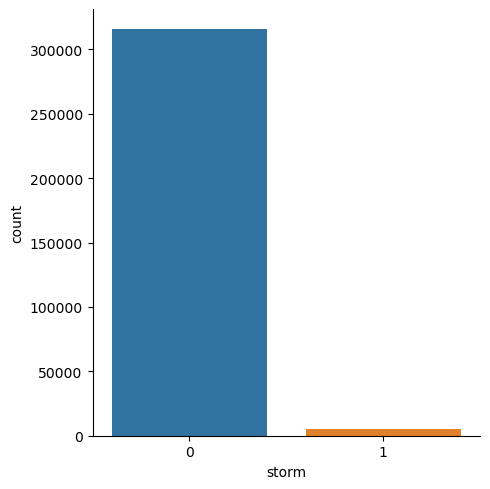

In [18]:
sns.catplot(data=stands,x = "storm",kind="count")
plt.show()

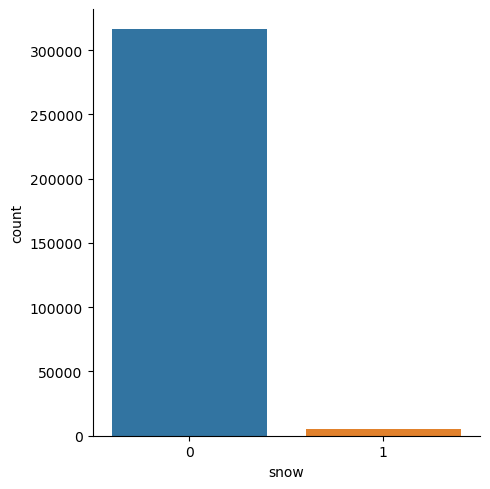

In [19]:
sns.catplot(data=stands,x = "snow",kind="count")
plt.show()

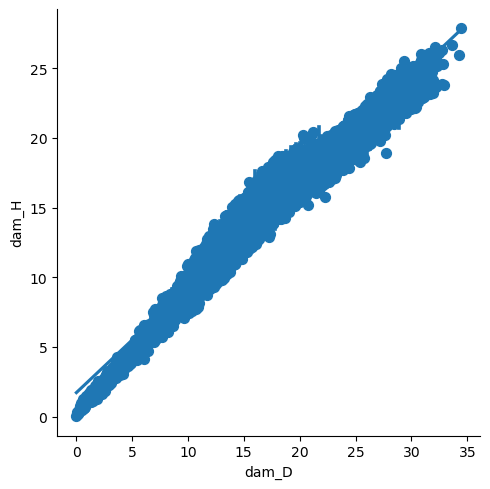

In [23]:
# two variable relationshio

sns.lmplot(x="dam_D", y="dam_H", data=stands)
plt.show()

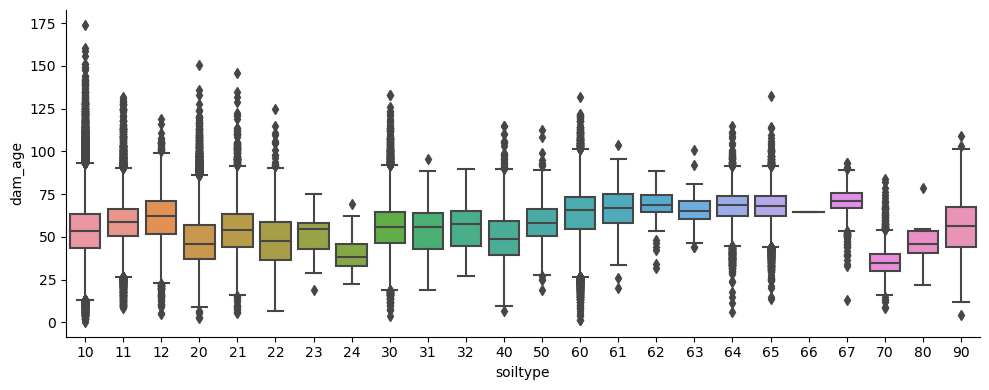

In [30]:
sns.catplot(data=stands, x="soiltype", y="dam_age", kind="box",height=4,aspect=2.5)
plt.show()

# Modeling

In [32]:
stands.columns

Index(['Unnamed: 0', 'poly_ID', 'dam_year', 'storm', 'snow', 'altitude',
       'fertilityc', 'soiltype', 'developmentc', 'mainsp', 'dam_G', 'dam_H',
       'dam_D', 'dam_ratioHD', 'dam_age'],
      dtype='object')

In [55]:
X = stands.drop(columns=['storm', 'Unnamed: 0',
                    'poly_ID', 'dam_year', 'snow'])
categorical_features= ['fertilityc','soiltype', 'developmentc','mainsp']
enc = OrdinalEncoder() # to tell sklearn therr are caterogical variables
X[categorical_features] = enc.fit_transform(X[categorical_features])

y1 = stands['storm'].astype('category')
y2 = stands['snow'].astype('category')

In [35]:
X_train, X_test, y_train, y_test = train_test_split(
        X, y1, test_size=0.25, random_state=42,stratify=y1)

In [47]:
# creat a gbm model
gbm = GradientBoostingClassifier(n_estimators=100,
                                 learning_rate=0.1,
                                 subsample=1)


gbm .fit(X_train, y_train)

print("Accuracy score (training): {0:.3f}".format(gbm.score(X_train, y_train)))

Accuracy score (training): 0.983


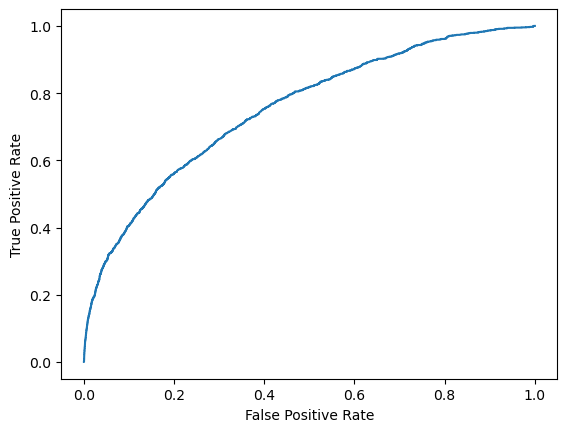

In [45]:
#define roc
y_pred_proba = gbm.predict_proba(X_test)[::,1]
fpr, tpr, _ = roc_curve(y_test,  y_pred_proba)
#create ROC curve
plt.plot(fpr,tpr)
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

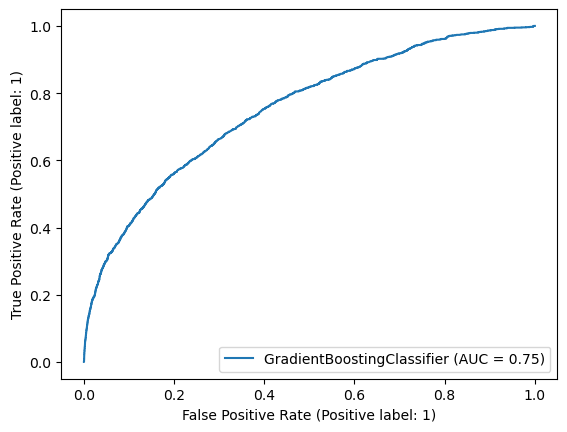

In [48]:
# ROC CURVE 
RocCurveDisplay.from_estimator(gbm, X_test, y_test)
plt.show()

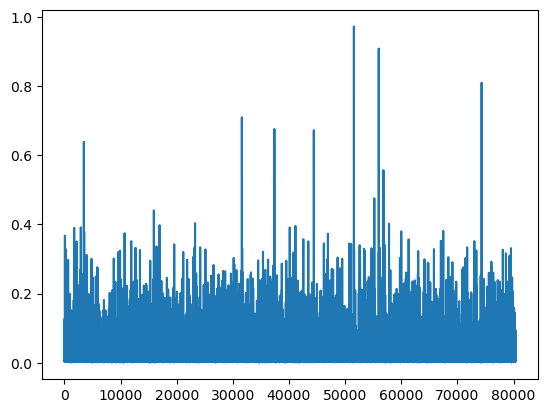

In [46]:
plt.plot(y_pred_proba)
plt.show()

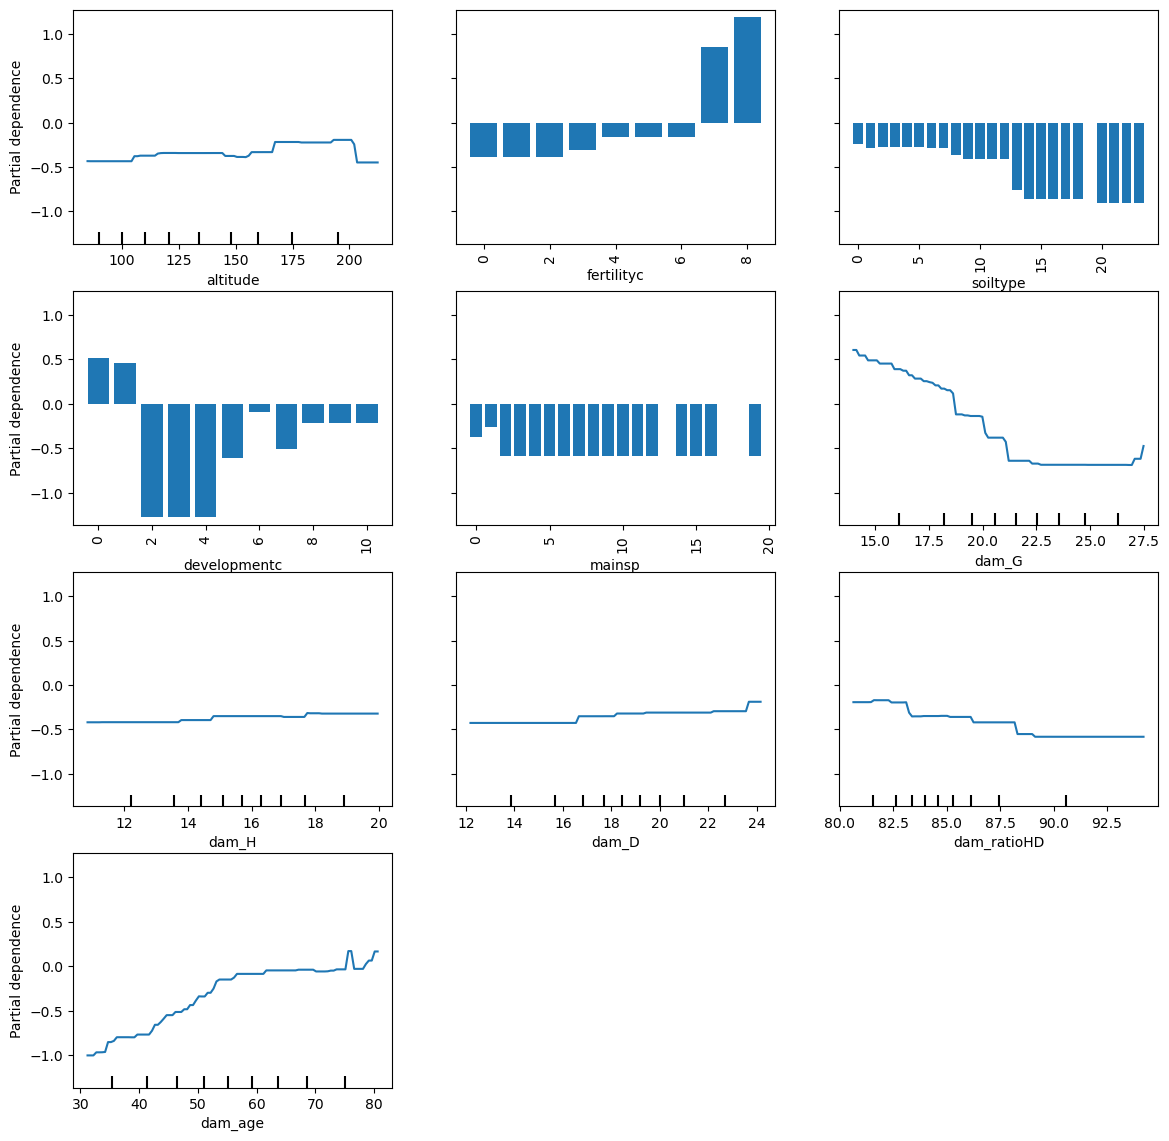

In [54]:

features_info = {
    # features of interest
    "features": ['altitude', 'fertilityc', 'soiltype', 'developmentc', 'mainsp', 'dam_G',
       'dam_H', 'dam_D', 'dam_ratioHD', 'dam_age'],
    # type of partial dependence plot
    "kind": "average",
    # information regarding categorical features
    "categorical_features": ['fertilityc','soiltype', 'developmentc','mainsp'],
}
#####PLOT ######
fig, ax = plt.subplots(figsize=(14, 14))
PartialDependenceDisplay.from_estimator(
    gbm.fit(X_train, y_train),
    X_train,
    target = 1,n_jobs=2,
    **features_info,
    ax=ax
    )
plt.show()

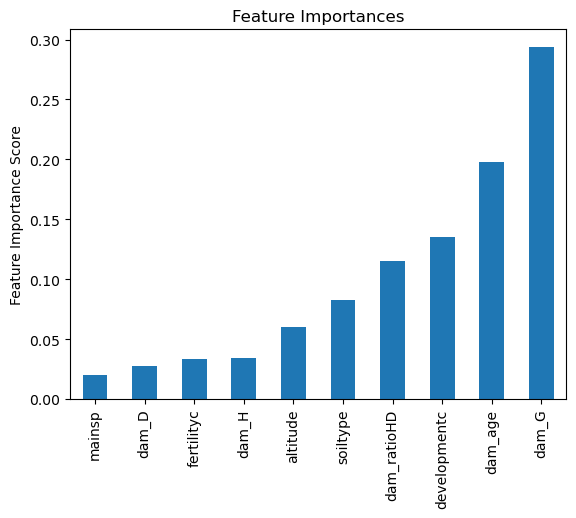

In [53]:
# variable importance
feat_imp = pd.Series(gbm.feature_importances_,index = X_train.columns).sort_values(ascending=True)
feat_imp.plot(kind='bar', title='Feature Importances')
plt.ylabel('Feature Importance Score')
plt.show()

## plot results

In [56]:
# first we add results to train data and test data
y_pred_proba1 = gbm.predict_proba(X_train)[::,1]
y_pred_proba2 = gbm.predict_proba(X_test)[::,1]

X_train['probability'] = y_pred_proba1
X_test['probability'] = y_pred_proba2

final_data = pd.concat([X_train,X_test])
final_data.head()


,altitude,fertilityc,soiltype,developmentc,mainsp,dam_G,dam_H,dam_D,dam_ratioHD,dam_age,probability
54557,119.976923,1.0,3.0,7.0,1.0,25.350877,20.557895,24.859649,82.695836,61.526316,0.016227
202626,136.913750,3.0,0.0,6.0,0.0,21.360000,17.396500,20.065000,86.700723,62.935000,0.016723
298025,165.829545,2.0,3.0,6.0,3.0,22.185714,13.412857,15.485714,86.614391,49.128571,0.007478
197964,113.274074,2.0,0.0,7.0,0.0,23.359375,17.301562,21.515625,80.413943,76.625000,0.011796
238133,188.690769,2.0,0.0,6.0,1.0,22.560510,13.834395,15.872611,87.158909,45.337580,0.010052


In [57]:
final_data

,altitude,fertilityc,soiltype,developmentc,mainsp,dam_G,dam_H,dam_D,dam_ratioHD,dam_age,probability
54557,119.976923,1.0,3.0,7.0,1.0,25.350877,20.557895,24.859649,82.695836,61.526316,0.016227
202626,136.913750,3.0,0.0,6.0,0.0,21.360000,17.396500,20.065000,86.700723,62.935000,0.016723
298025,165.829545,2.0,3.0,6.0,3.0,22.185714,13.412857,15.485714,86.614391,49.128571,0.007478
197964,113.274074,2.0,0.0,7.0,0.0,23.359375,17.301562,21.515625,80.413943,76.625000,0.011796
238133,188.690769,2.0,0.0,6.0,1.0,22.560510,13.834395,15.872611,87.158909,45.337580,0.010052
...,...,...,...,...,...,...,...,...,...,...,...
297281,175.000000,4.0,2.0,7.0,0.0,18.666667,15.233333,18.000000,84.629630,67.333333,0.025055
247345,193.333333,2.0,4.0,6.0,3.0,22.461538,15.638462,18.307692,85.420168,58.384615,0.014490
16829,112.500000,2.0,0.0,5.0,0.0,19.769231,12.346154,14.461538,85.372340,35.076923,0.004585
6360,143.520833,1.0,0.0,5.0,2.0,19.618182,13.378182,14.890909,89.841270,35.036364,0.002902


In [60]:
stands[['poly_ID']]

,poly_ID
0,1
1,2
2,3
3,4
4,5
...,...
321205,695770
321206,695771
321207,695772
321208,695773


In [62]:
# we could merge the 2 dataframes by index
final_data = pd.merge(final_data,stands[['poly_ID']],left_index=True,right_index=True)
final_data.head()

,altitude,fertilityc,soiltype,developmentc,mainsp,dam_G,dam_H,dam_D,dam_ratioHD,dam_age,probability,poly_ID
54557,119.976923,1.0,3.0,7.0,1.0,25.350877,20.557895,24.859649,82.695836,61.526316,0.016227,133045
202626,136.913750,3.0,0.0,6.0,0.0,21.360000,17.396500,20.065000,86.700723,62.935000,0.016723,464233
298025,165.829545,2.0,3.0,6.0,3.0,22.185714,13.412857,15.485714,86.614391,49.128571,0.007478,650388
197964,113.274074,2.0,0.0,7.0,0.0,23.359375,17.301562,21.515625,80.413943,76.625000,0.011796,456627
238133,188.690769,2.0,0.0,6.0,1.0,22.560510,13.834395,15.872611,87.158909,45.337580,0.010052,531091


### load shp file 

In [85]:
# Load shp file
import shapefile
#from shapely.geometry import shape

shapefile = shapefile.Reader("polygons_BRT.shp")

#my_shp = r"PhojosKarelia.geojson"
#my_polygon = gpd.read_file(my_shp)


In [86]:
shape = shapefile.shapes()
record = shapefile.records()

In [87]:
# Extract the geometry type (Point, LineString, Polygon, etc.) and coordinates
geoms = [gpd.GeoSeries(s.__geo_interface__) for s in shape]

# Combine the geometries and attribute records to create the DataFrame
gdf = gpd.GeoDataFrame(record, geometry=geoms)

TypeError: Non geometry data passed to GeoSeries constructor, received data of dtype 'object'

In [90]:
#fields = [field[0] for field in shape.fields[1:]] # colunames

attributes = []
geometry = []

for row in shapefile.shapeRecords():
    geometry.append(row.shape.__geo_interface__)
    attributes.append(row.record)

In [93]:
crs = '+proj=utm +zone=35 +ellps=GRS80 +towgs84=0,0,0,0,0,0,0 +units=m +no_defs'

In [94]:
gpd.GeoDataFrame(attributes, geometry=geometry,crs=crs="EPSG:3067")

TypeError: Input must be valid geometry objects: {'type': 'Polygon', 'coordinates': [[(630752.8339999998, 6881987.809), (630752.8320000004, 6881987.822000001), (630752.8399999999, 6881987.8429999985), (630780.3099999996, 6882015.9059999995), (630783.4179999996, 6882017.054000001), (630783.4400000004, 6882017.068), (630784.8030000003, 6882017.471000001), (630784.8159999996, 6882017.4690000005), (630784.8279999997, 6882017.4629999995), (630784.9450000003, 6882017.368000001), (630784.9579999996, 6882017.368000001), (630787.3140000002, 6882018.0929999985), (630787.3320000004, 6882018.090999998), (630787.3490000004, 6882018.081999999), (630797.8870000001, 6882007.544), (630831.8899999997, 6881974.541000001), (630835.4970000004, 6881972.175999999), (630855.1430000002, 6881959.293000001), (630865.8159999996, 6881956.618000001), (630865.8329999996, 6881956.601), (630865.9199999999, 6881956.357999999), (630865.9210000001, 6881956.346000001), (630864.0259999996, 6881939.294), (630863.7920000004, 6881934.739), (630863.7790000001, 6881934.7179999985), (630863.7649999997, 6881934.712000001), (630847.3969999999, 6881934.1559999995), (630795.1830000002, 6881952.903000001), (630794.858, 6881952.449000001), (630794.8449999997, 6881952.442000002), (630794.8320000004, 6881952.442000002), (630794.818, 6881952.449000001), (630752.8420000002, 6881987.798), (630752.8339999998, 6881987.809)]]}

In [97]:
attributes

[Record #-1: [1.0, 1.0, 24038741.0, '1-2022-37461', 2.0, 0.42, 0.0, 0.0, 7.0, 3.0, 5.0, 0.0, 2022, 0, 0, 75.9125, '1', '10', 18.1764705882353, 19.7823529411765, 20.4117647058824, 96.91642651296823, 40.7058823529412],
 Record #-1: [2.0, 2.0, 21929129.0, '1-2020-27317', 8.0, 0.81, 0.0, 0.0, 7.0, 3.0, 3.0, 0.0, 2020, 0, 0, 81.6076923076923, '2', '70', 20.15625, 17.09375, 16.4375, 103.99239543726236, 33.28125],
 Record #-1: [3.0, 3.0, 21929128.0, '1-2020-27317', 10.0, 0.99, 0.0, 0.0, 7.0, 3.0, 3.0, 0.0, 2020, 0, 0, 82.82, '2', '10', 20.7692307692308, 18.2974358974359, 18.8717948717949, 96.95652173913031, 37.3333333333333],
 Record #-1: [4.0, 4.0, 19963574.0, '1-2018-86789', 458.0, 12.0, 1.0, 1.0, 7.0, 3.0, 3.0, 1504.0, 2018, 0, 0, 87.0258992805755, '2', '10', 21.2063953488372, 19.5799418604651, 21.3982558139535, 91.50251324548283, 46.1220930232558],
 Record #-1: [5.0, 5.0, 17613756.0, '1-2016-47628', 458.0, 12.1, 1.0, 1.0, 7.0, 3.0, 3.0, 0.0, 2016, 0, 0, 87.7338461538462, '2', '10', 17.401

In [99]:
m = folium.Map(location = [38.34, -0.49], zoom_start = 13)
geojson_url = "PhojosKarelia.geojson"


folium.GeoJson(data = geojson_url, name = "geojson").add_to(m)

m